# This notebook is dedicated to compare the biodiversity indices (Species Richness, Alpha Biodiversity) calculated from field data and calculated from spectral species map. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_Raster = cwd + "\\Results"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [3]:
df_Raster_6 = pd.read_csv(cwd_Raster + "\\2022 06Cropped Alpha Diversity.csv")
df_Raster_9 = pd.read_csv(cwd_Raster + "\\2022 09Cropped Alpha Diversity.csv")
df_Raster_6.head()

,Plot,Raster 20Clusters Species Richness,Raster 20Clusters Shannon,Raster 20Clusters Simpson,Raster 35Clusters Species Richness,Raster 35Clusters Shannon,Raster 35Clusters Simpson,Raster 50Clusters Species Richness,Raster 50Clusters Shannon,Raster 50Clusters Simpson
0,FOR01,8.05,1.950667,0.84576,10.95,2.172363,0.86400,12.90,2.414920,0.89856
1,FOR02,4.85,1.193331,0.64176,8.35,1.830948,0.79808,9.85,2.074967,0.85056
2,FOR03,4.95,1.489291,0.75680,6.80,1.708687,0.79232,9.35,2.079390,0.85760
3,FOR04,3.00,0.797340,0.46224,5.10,1.347368,0.68304,8.10,1.865050,0.81488
4,FOR05,4.25,0.993256,0.53712,5.45,1.334504,0.66144,6.60,1.586574,0.74960


In [4]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Raster 20Clusters Species Richness','Raster 20Clusters Shannon','Raster 20Clusters Simpson']],df_Raster_9[['Plot','Raster 20Clusters Species Richness','Raster 20Clusters Shannon','Raster 20Clusters Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Raster 20Clusters Species Richness June,Raster 20Clusters Shannon June,Raster 20Clusters Simpson June,Raster 20Clusters Species Richness Sep,Raster 20Clusters Shannon Sep,Raster 20Clusters Simpson Sep
0,FOR01,8.05,1.950667,0.84576,8.80,1.821541,0.78608
1,FOR02,4.85,1.193331,0.64176,4.15,1.103780,0.58368
2,FOR03,4.95,1.489291,0.75680,4.55,1.131112,0.57248
3,FOR04,3.00,0.797340,0.46224,5.55,1.497574,0.74000
4,FOR05,4.25,0.993256,0.53712,5.10,1.324149,0.67648


In [5]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,8.05,1.950667,0.84576,8.80,1.821541,0.78608
1,FOR02,4.85,1.193331,0.64176,4.15,1.103780,0.58368
2,FOR03,4.95,1.489291,0.75680,4.55,1.131112,0.57248
3,FOR04,3.00,0.797340,0.46224,5.55,1.497574,0.74000
4,FOR05,4.25,0.993256,0.53712,5.10,1.324149,0.67648


In [6]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [8]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,3.65,1.040898,0.60272,3.00,0.868796,0.53232,Prunus
59,FOR79,7.00,1.634144,0.76384,5.00,1.388637,0.70560,Mixed deciduous
60,FOR80,3.95,1.043367,0.56128,2.95,0.780036,0.46464,Mixed deciduous
61,FOR81,4.90,1.241117,0.65776,3.35,1.009620,0.58336,Mixed deciduous
62,FOR82,3.65,1.015282,0.59328,4.55,1.010532,0.53232,Mixed deciduous


## Species Richness Comparison

In [9]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [10]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [11]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,8.05,8.80
1,FOR02,7,Prunus,4.85,4.15
2,FOR03,4,Prunus,4.95,4.55
3,FOR04,2,Oak_open_canopy,3.00,5.55
4,FOR05,1,Oak_open_canopy,4.25,5.10


### Statistics

mean std min max median

In [12]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,4.967460,5.071429
std,1.865415,1.608951,1.712824
min,1.000000,2.000000,1.150000
25%,2.000000,3.925000,4.000000
50%,3.000000,4.800000,5.100000
75%,4.000000,6.425000,6.300000
max,8.000000,8.050000,8.800000


In [13]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,6.95,6.25
19,FOR20,3,Alder,8.05,7.65
35,FOR55,2,Alder,7.25,7.80
7,FOR08,4,Alder,3.85,4.95
36,FOR56,2,Alder,7.70,7.60
...,...,...,...,...,...
24,FOR25,1,Pine,4.80,5.25
30,FOR31,2,Pine,4.10,4.60
58,FOR78,2,Prunus,3.65,3.00
2,FOR03,4,Prunus,4.95,4.55


## Plot

C:\Users\m1865\AppData\Local\Temp\ipykernel_3296\1230078817.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_Richness_1_Asso['Association'])


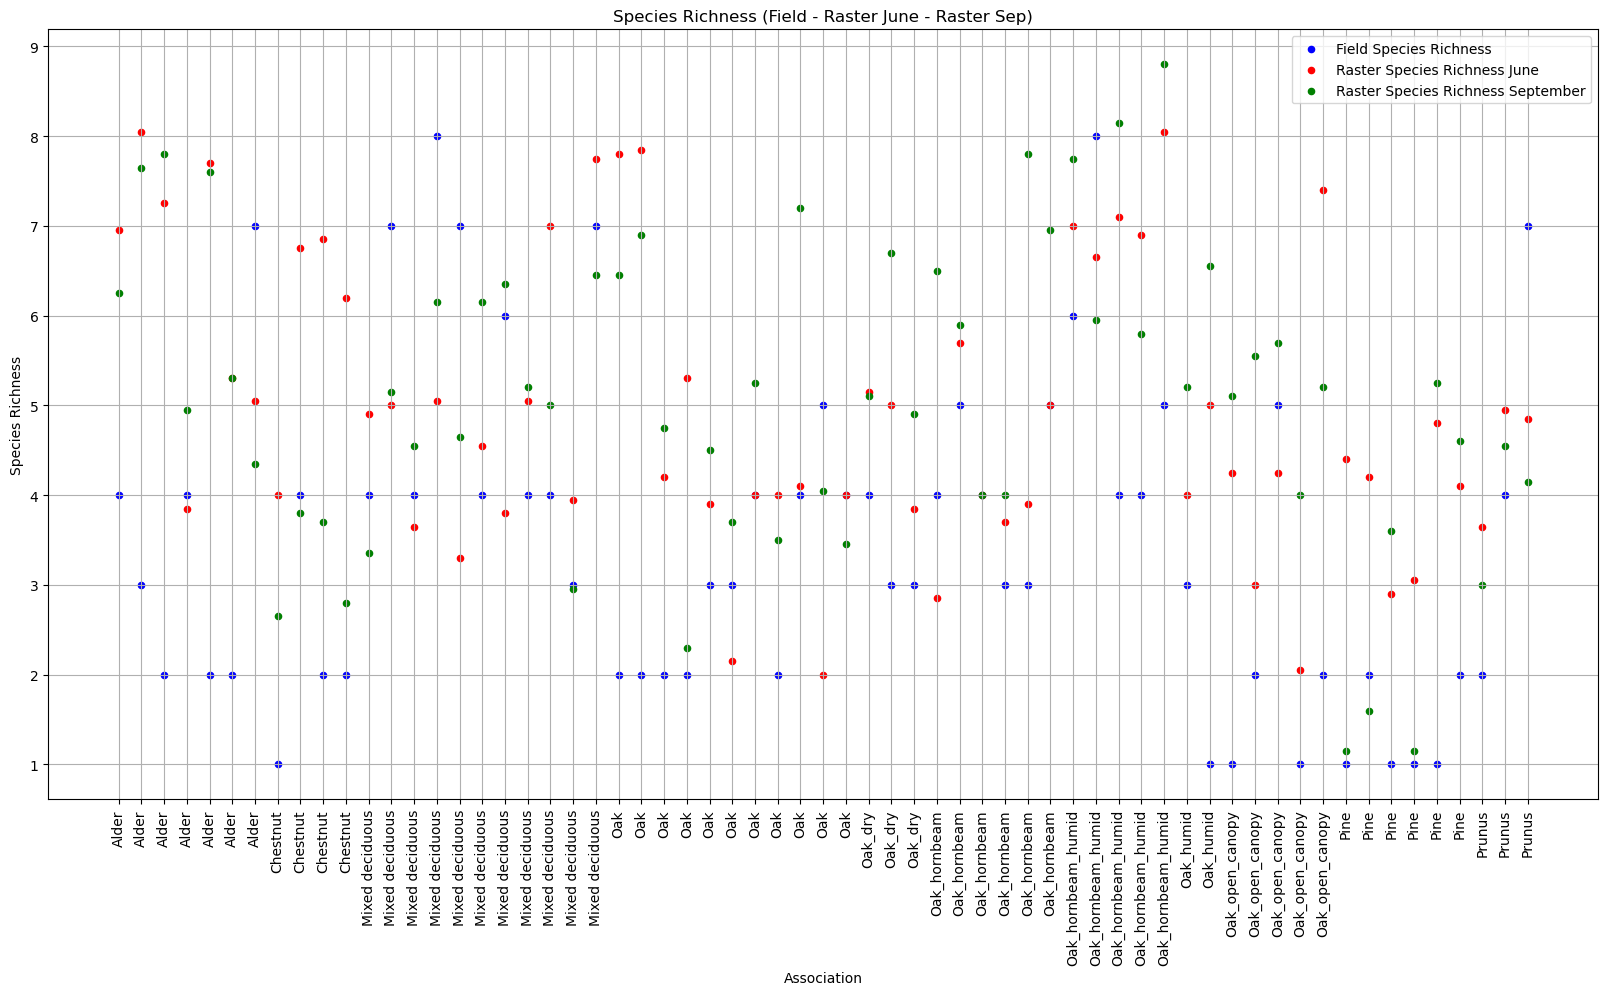

In [15]:
ax1 = df_Richness_1_Asso.plot(x = 'Plot',y = 'Field Species Richness', figsize=(20,10), kind='scatter', color = 'b', label = 'Field Species Richness')
ax2 = df_Richness_1_Asso.plot(x = 'Plot',y = 'Raster Species Richness June', figsize=(20,10), kind='scatter', color = 'r', label = 'Raster Species Richness June', ax = ax1)
ax3 = df_Richness_1_Asso.plot(x = 'Plot',y = 'Raster Species Richness Sep', figsize=(20,10), kind='scatter', color = 'g', label = 'Raster Species Richness September', ax = ax1)
ax1.set_xticklabels(df_Richness_1_Asso['Association'])
ax1.set_xlabel('Association')
ax1.set_ylabel('Species Richness')
plt.title('Species Richness (Field - Raster June - Raster Sep)')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Scatter Plot: Field Value - Raster June Value

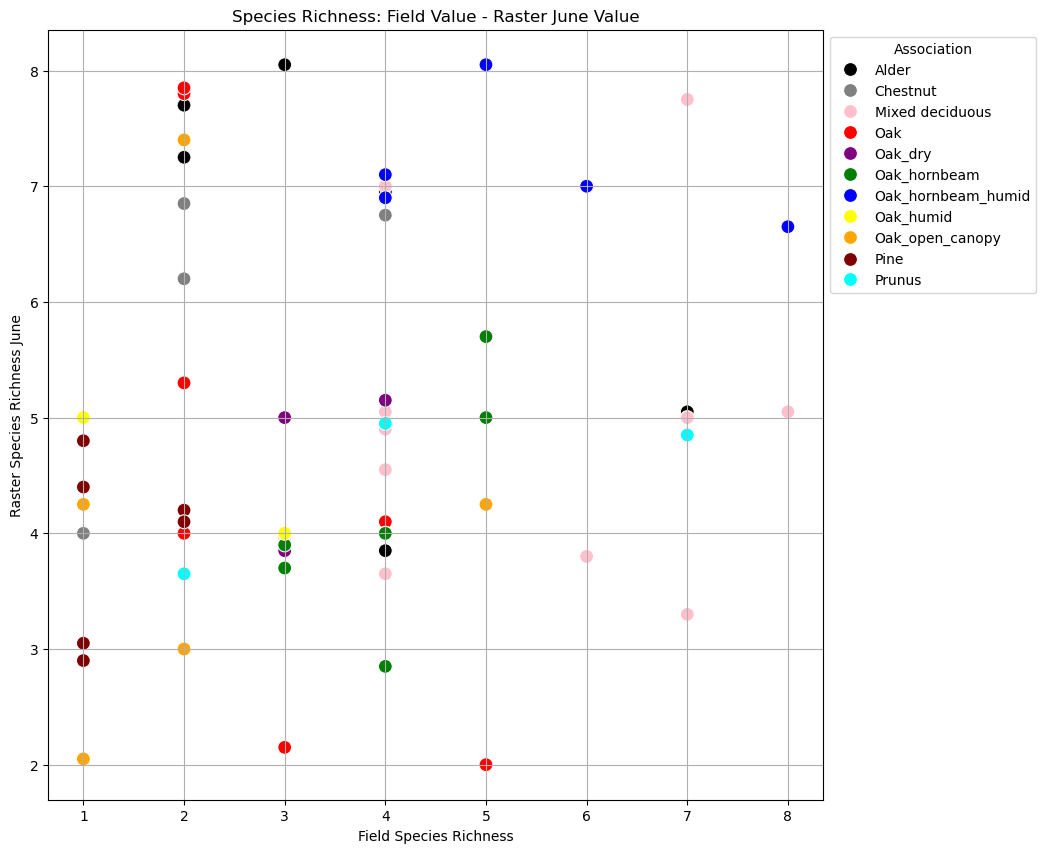

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

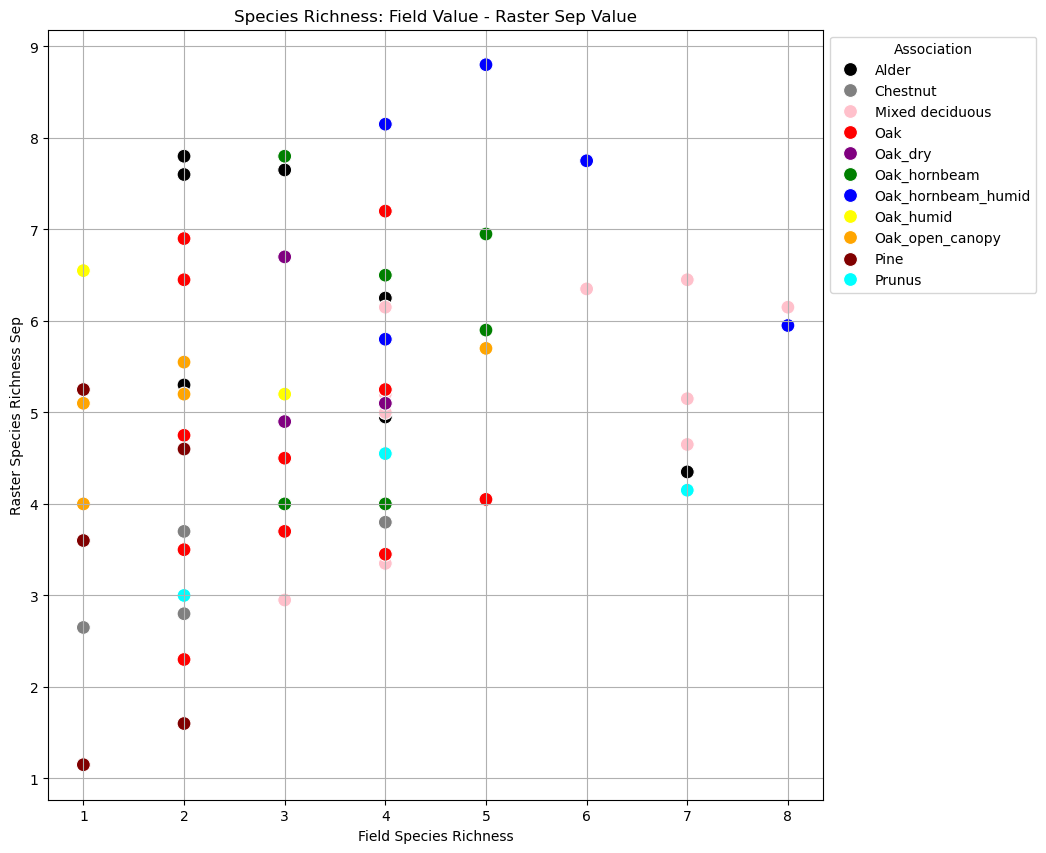

In [17]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

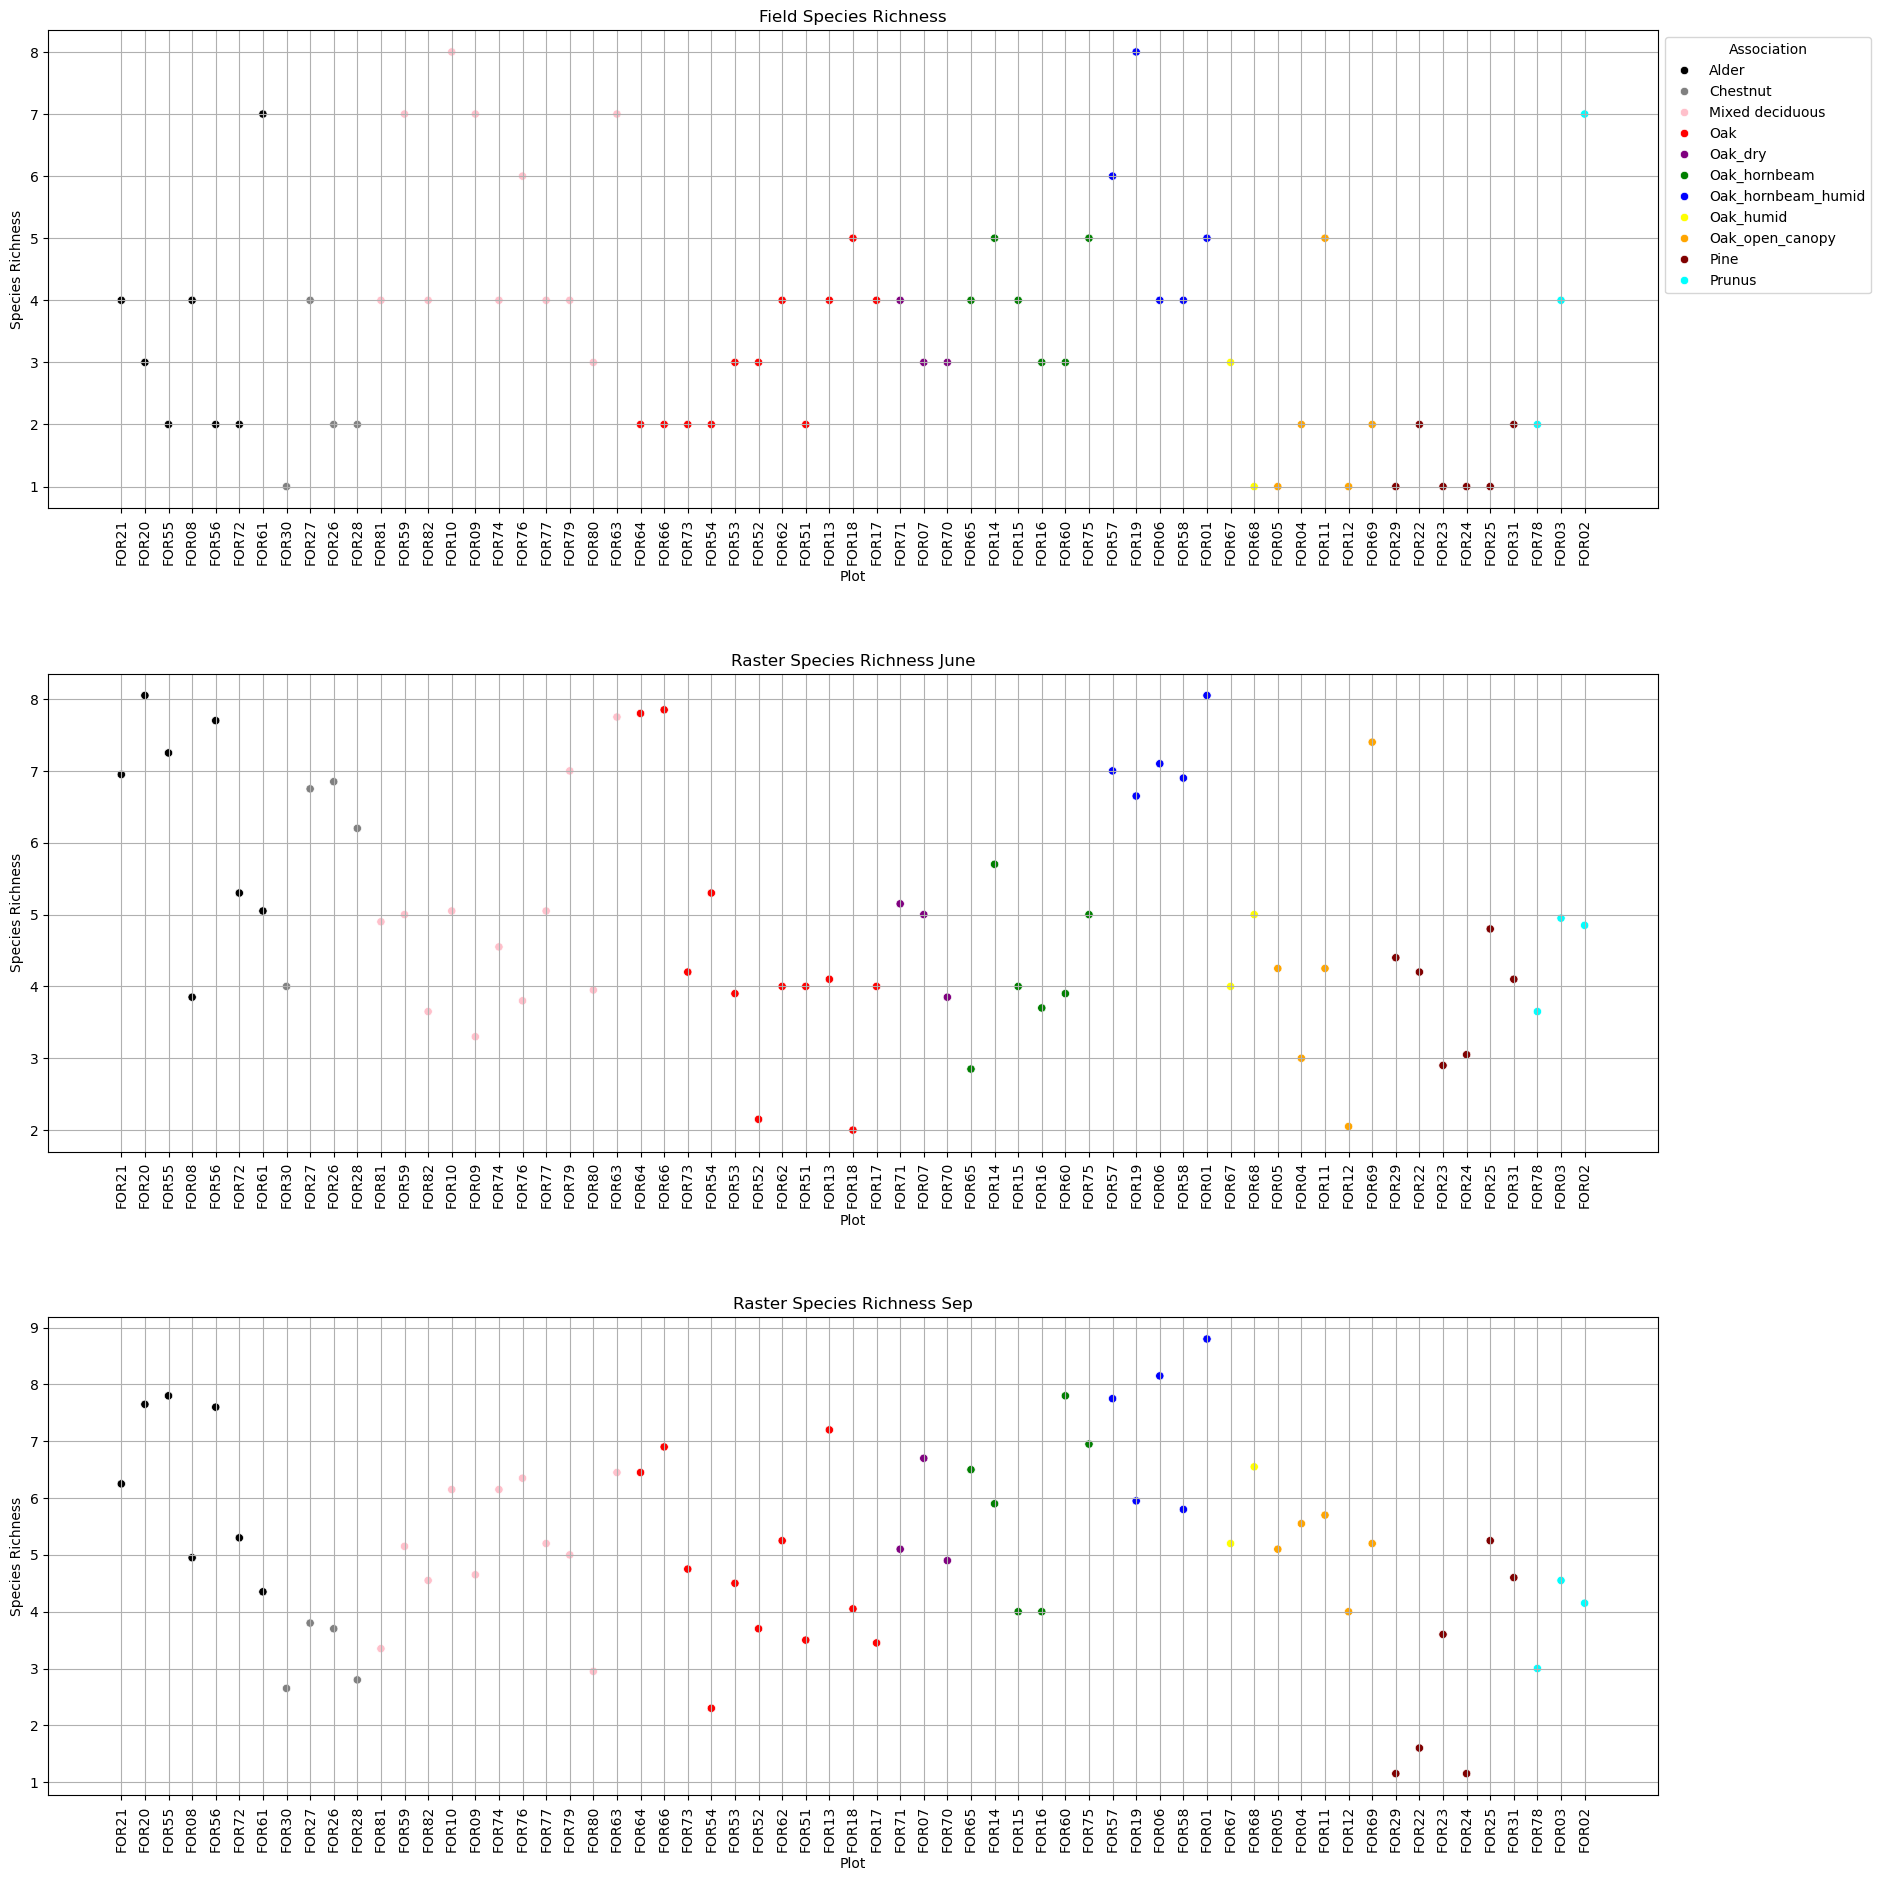

In [18]:
fig, ax = plt.subplots(figsize = (20,20),nrows = 3)
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
sns.scatterplot(x = 'Plot',y = 'Field Species Richness', data = df_Richness_1_Asso, hue = 'Association', palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'], ax = ax1)
sns.scatterplot(x = 'Plot',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'], ax = ax2, legend = None)
sns.scatterplot(x = 'Plot',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'], ax = ax3, legend = None)

ax1.set_title('Field Species Richness')
ax1.tick_params(axis = 'x', labelrotation = 90)
ax1.set_xlabel('Plot')
ax1.set_ylabel('Species Richness')
ax1.grid()
# for i, txt in enumerate(df_Richness_1_Typo['Typology']):
#     ax1.annotate(txt, (df_Richness_1['Plot'][i], df_Richness_1['Field Species Richness'][i]))

ax2.set_title('Raster Species Richness June')
ax2.tick_params(axis = 'x', labelrotation = 90)
ax2.set_xlabel('Plot')
ax2.set_ylabel('Species Richness')
ax2.grid()

ax3.set_title('Raster Species Richness Sep')
ax3.tick_params(axis = 'x', labelrotation = 90)
ax3.set_xlabel('Plot')
ax3.set_ylabel('Species Richness')
ax3.grid()

sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
fig.tight_layout(pad=5)
plt.show()


Null Hypothesis and Pearson Coefficient

In [19]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.702630773227363
6.728375865394214e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.13859983873265913
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


R Square

In [20]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-1.126887323425545

Mean Absolute Error

In [21]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

2.1753968253968257

### Sep
Null Hypothesis and Pearson Coefficient

In [22]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.900235865668502
2.928718157151194e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.31102932280161544
Perfect! The Pearson correlation coefficient is considered statistically significant!


R Square

In [23]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-0.9857375662154215

Mean Absolute Error

In [24]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

2.101587301587302

## Shannon

In [25]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [26]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [27]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,1.040898,0.868796
59,FOR79,1.344339,Mixed deciduous,1.634144,1.388637
60,FOR80,0.918320,Mixed deciduous,1.043367,0.780036
61,FOR81,1.301362,Mixed deciduous,1.241117,1.009620
62,FOR82,1.193337,Mixed deciduous,1.015282,1.010532


In [28]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.054217,1.086156
30,FOR31,0.146145,Pine,1.025463,0.848264
58,FOR78,0.286836,Prunus,1.040898,0.868796
2,FOR03,0.534923,Prunus,1.489291,1.131112
1,FOR02,1.604816,Prunus,1.193331,1.103780


### June

Scatter Plot

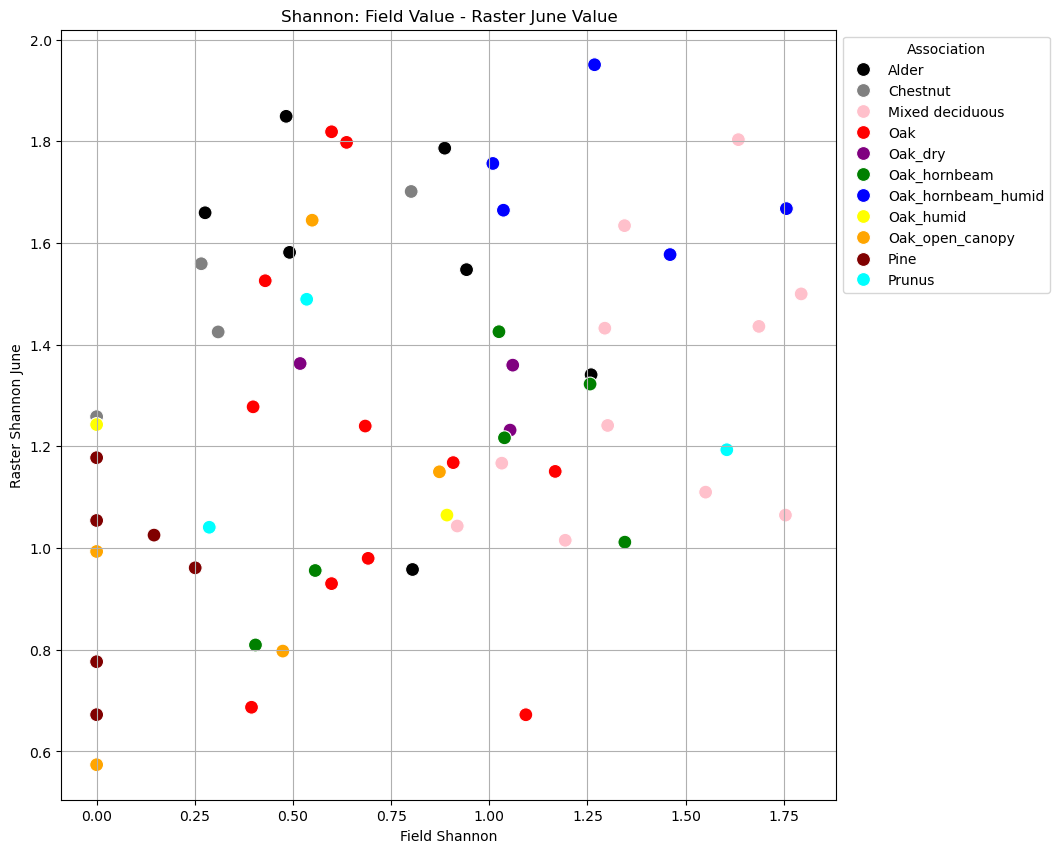

In [29]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

Null Hypothesis & Pearson Correlation Coefficient

In [30]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.2067177393895605
7.444670945833461e-09
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.3107109122679821
Perfect! The Pearson correlation coefficient is considered statistically significant!


R Square

In [31]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-0.9002241970697602

Mean Absolute Error

In [32]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.585445483162704

### Sep
Null Hypothesis & Pearson Correlation Coefficient

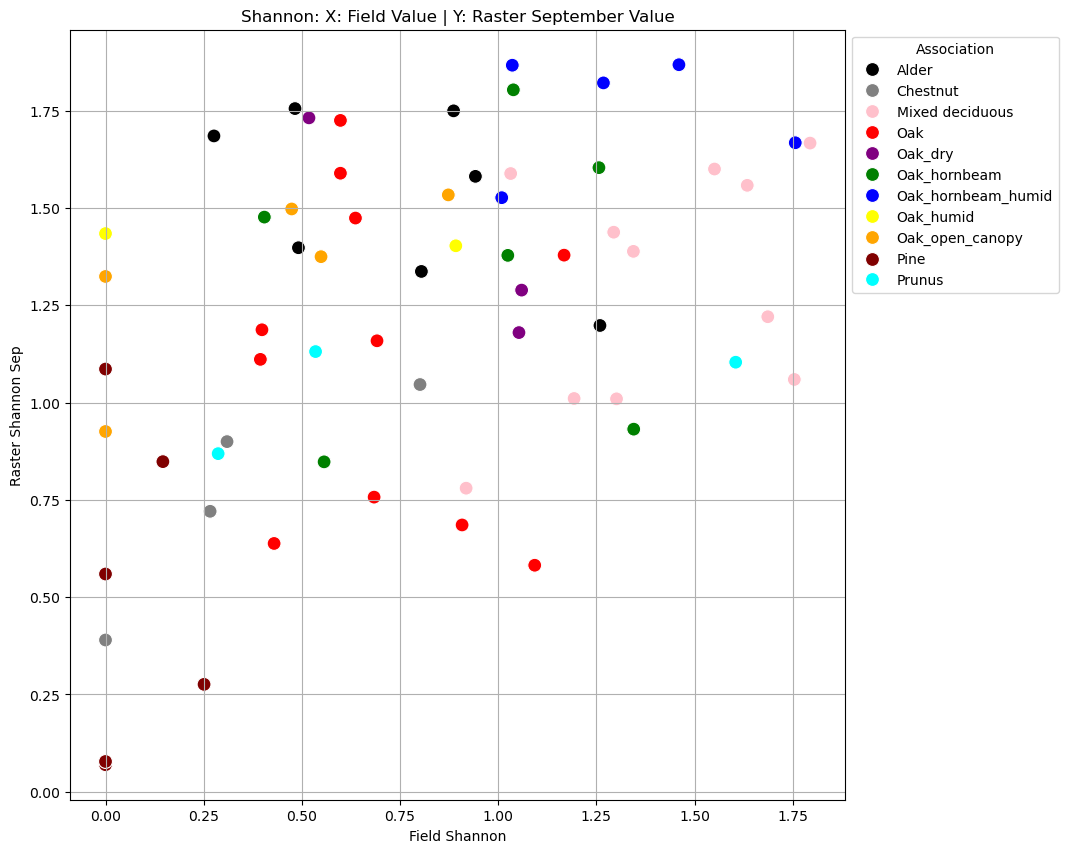

In [37]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [34]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.973907053254192
2.136448105661459e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.43639049350820425
Perfect! The Pearson correlation coefficient is considered statistically significant!


R Square

In [35]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.6603081521139447

Mean Absolute Error

In [36]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5461351014288778

# Simpson

In [38]:
df_Field_Simpson = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Simpson.csv")
df_Field_Simpson.head()

,Plot,Field Simpson
0,FOR01,0.685121
1,FOR02,0.752500
2,FOR03,0.250000
3,FOR04,0.297521
4,FOR05,0.000000


In [40]:
df_Field_Simpson1 = df_Field_Simpson.copy().iloc[0:63,:]
df_Field_Simpson1.tail()

,Plot,Field Simpson
58,FOR78,0.152778
59,FOR79,0.729600
60,FOR80,0.557778
61,FOR81,0.708889
62,FOR82,0.657484


In [41]:
df_Simpson_1 = pd.merge(df_Field_Simpson1,df_Raster_Merge_1[['Plot','Association','Raster Simpson June','Raster Simpson Sep']],on = 'Plot')
df_Simpson_1.tail()

,Plot,Field Simpson,Association,Raster Simpson June,Raster Simpson Sep
58,FOR78,0.152778,Prunus,0.60272,0.53232
59,FOR79,0.729600,Mixed deciduous,0.76384,0.70560
60,FOR80,0.557778,Mixed deciduous,0.56128,0.46464
61,FOR81,0.708889,Mixed deciduous,0.65776,0.58336
62,FOR82,0.657484,Mixed deciduous,0.59328,0.53232


In [43]:
df_Simpson_1_Asso = df_Simpson_1.copy().sort_values('Association').reset_index(drop = True)
df_Simpson_1_Asso.tail()

,Plot,Field Simpson,Association,Raster Simpson June,Raster Simpson Sep
58,FOR25,0.000000,Pine,0.52416,0.54624
59,FOR31,0.064444,Pine,0.53376,0.42272
60,FOR78,0.152778,Prunus,0.60272,0.53232
61,FOR03,0.250000,Prunus,0.75680,0.57248
62,FOR02,0.752500,Prunus,0.64176,0.58368


## Plot

C:\Users\m1865\AppData\Local\Temp\ipykernel_3296\591180801.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_Simpson_1_Asso['Association'])


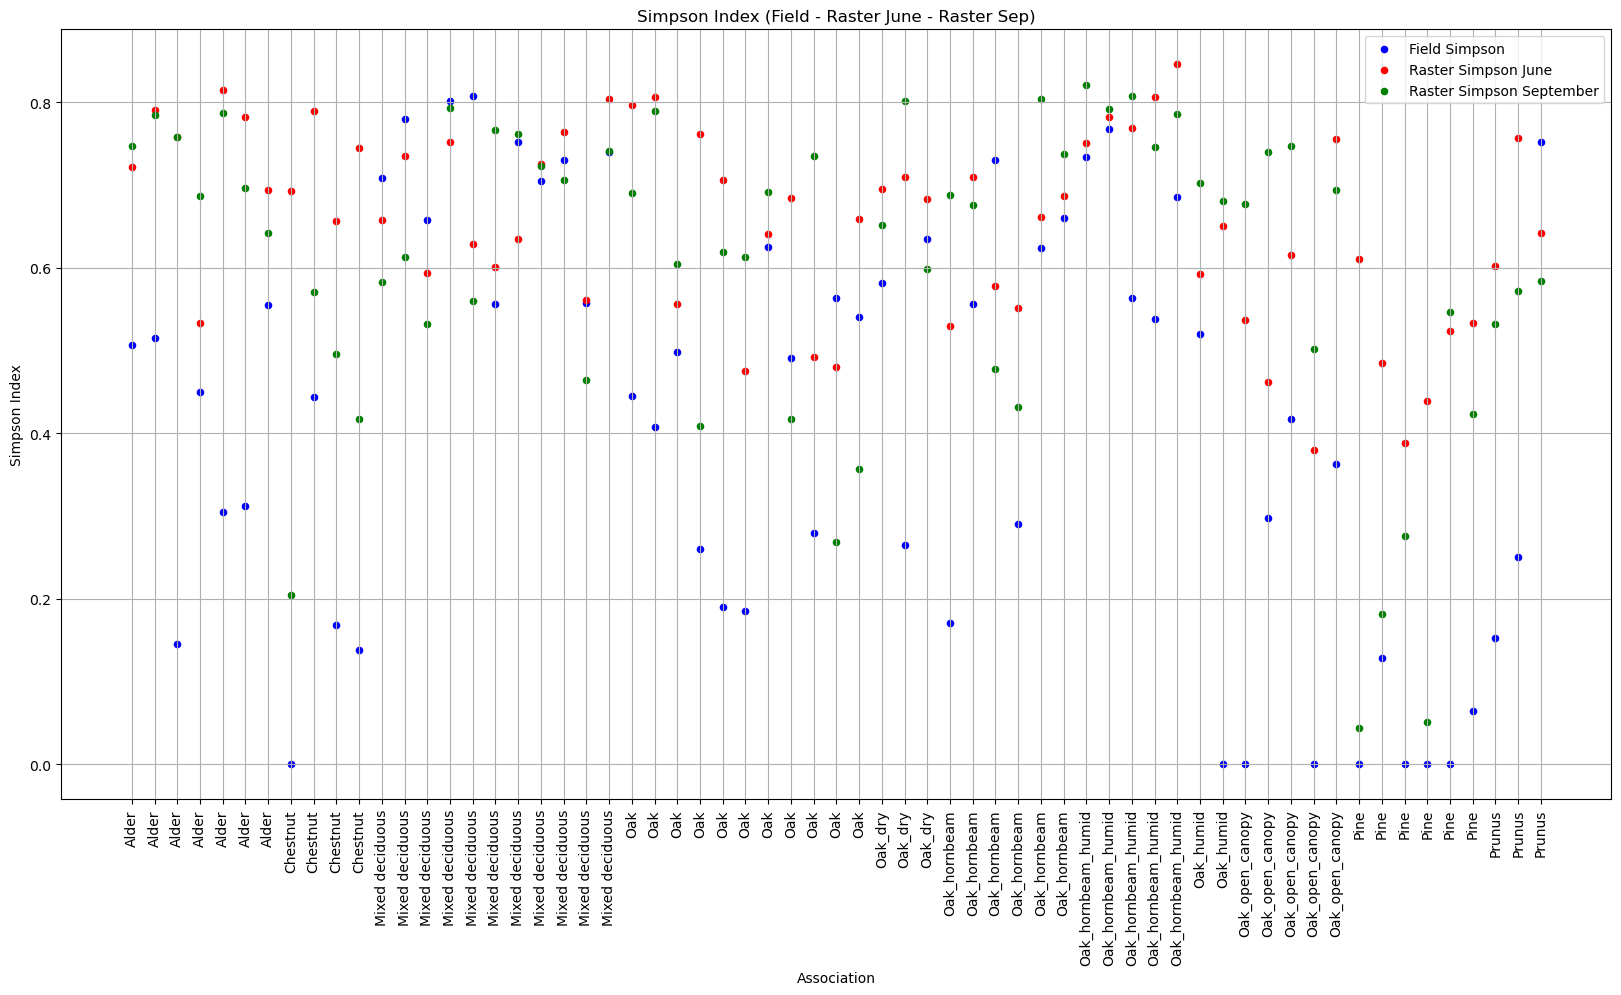

In [44]:
ax1 = df_Simpson_1_Asso.plot(x = 'Plot',y = 'Field Simpson', figsize=(20,10), kind='scatter', color = 'b', label = 'Field Simpson')
ax2 = df_Simpson_1_Asso.plot(x = 'Plot',y = 'Raster Simpson June', figsize=(20,10), kind='scatter', color = 'r', label = 'Raster Simpson June', ax = ax1)
ax3 = df_Simpson_1_Asso.plot(x = 'Plot',y = 'Raster Simpson Sep', figsize=(20,10), kind='scatter', color = 'g', label = 'Raster Simpson September', ax = ax1)
ax1.set_xticklabels(df_Simpson_1_Asso['Association'])
ax1.set_xlabel('Association')
ax1.set_ylabel('Simpson Index')
plt.title('Simpson Index (Field - Raster June - Raster Sep)')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

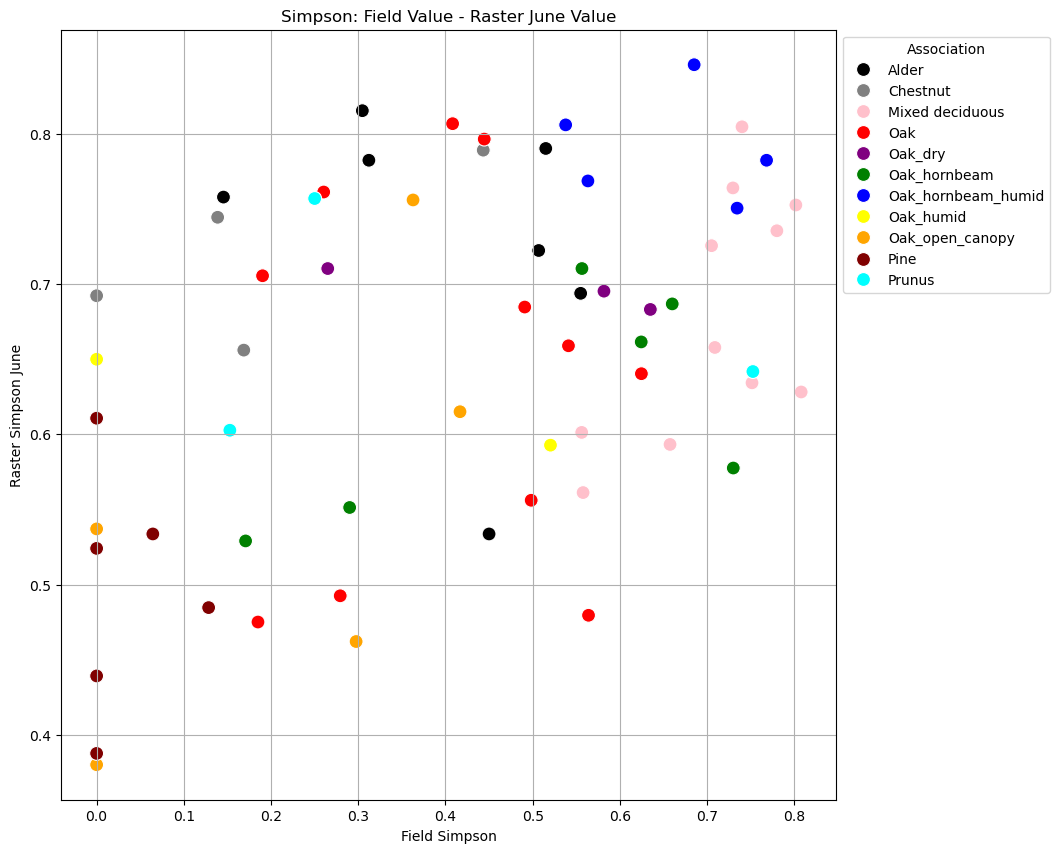

In [45]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Simpson',y = 'Raster Simpson June', data = df_Simpson_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Simpson: Field Value - Raster June Value')
plt.show()

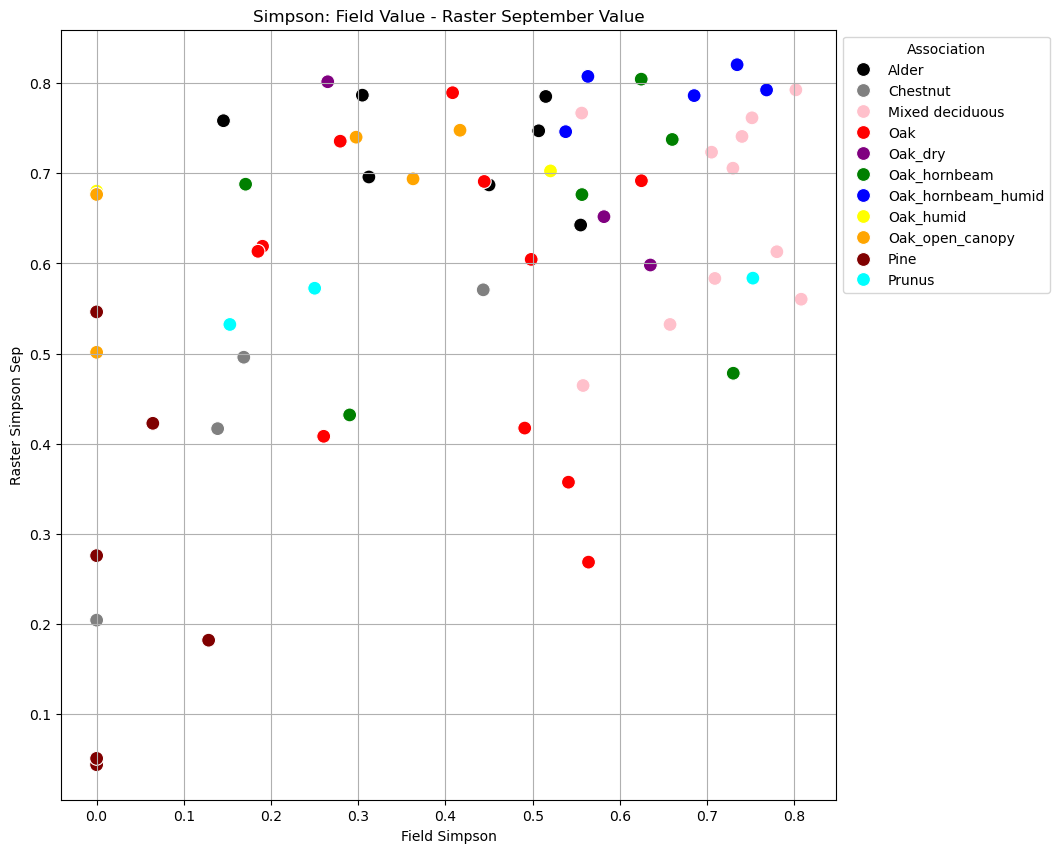

In [46]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Simpson',y = 'Raster Simpson Sep', data = df_Simpson_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Simpson: Field Value - Raster September Value')
plt.show()